In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MEAO = pd.read_excel('G:\Priyabrata\ML\Material data repository.xlsx')
INPUT=MEAO.iloc[:,2:11]  #all INPUT (Variables)
TARGET=MEAO.iloc[:,20]   #all PHASES SS,SS+IM,AM
#TARGET = MEAO.iloc[:,19]

Y=MEAO.iloc[:,22] #coded phases. 0:SS, 1:SS+IM, 2:AM
#Y = MEAO.iloc[:,23] #coded phases. 0:MSS, 1:SSS, 2:SS+IM, 3:AM


selected_INPUT = INPUT.drop(['Mixing entropy','Gamma','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT

normalized_INPUT=(selected_INPUT-selected_INPUT.mean())/selected_INPUT.std()

In [80]:
#KNN for supervised learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(normalized_INPUT, Y, test_size = 0.30)  #test data size is 30% of total size. #principalDataframe contains 3 PCs and Y contains coded phases (0:SS, 1:SS+IM, 2:AM)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

# Predictions and Evaluations
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred_knn))

print(classification_report(y_test, pred_knn))
metrics.accuracy_score(y_test,pred_knn)   

[[38  9  0]
 [ 0 12  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        47
           1       0.55      1.00      0.71        12
           2       1.00      0.92      0.96        12

    accuracy                           0.86        71
   macro avg       0.85      0.91      0.85        71
weighted avg       0.92      0.86      0.87        71



0.8591549295774648

In [81]:
#Stratified k fold cross validation (for imbalanced datasets)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
model = KNeighborsClassifier()
# evaluate model
scores = cross_val_score(model, normalized_INPUT, Y, scoring='accuracy', cv=skf, n_jobs=-1)
scores
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.885 (0.064)


In [82]:
#Repeated Stratified k fold cross validation (for imbalanced datasets)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
model = KNeighborsClassifier(n_neighbors=5)
# evaluate model
scores = cross_val_score(model, normalized_INPUT, Y, scoring='accuracy', cv=nskf, n_jobs=-1)
scores
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.877 (0.045)


[0.8127659574468085,
 0.8348936170212765,
 0.8782978723404256,
 0.8757446808510639,
 0.8774468085106384,
 0.88,
 0.8817021276595745,
 0.8834042553191489,
 0.8851063829787233,
 0.876595744680851,
 0.876595744680851,
 0.8689361702127659,
 0.8663829787234043,
 0.8663829787234042,
 0.8680851063829788,
 0.8697872340425532,
 0.8723404255319148,
 0.8680851063829788,
 0.8714893617021278,
 0.8697872340425532]

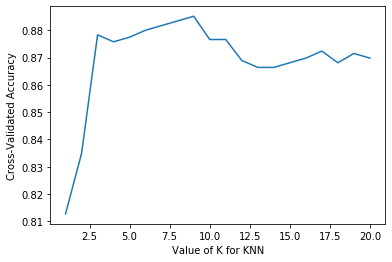

In [150]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 21)

# list of scores from k_range
k_scores = []



# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',n_neighbors=k,metric_params=None, n_jobs=-1, p=1,weights='uniform')
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, normalized_INPUT, Y, cv=nskf, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

    
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
k_scores

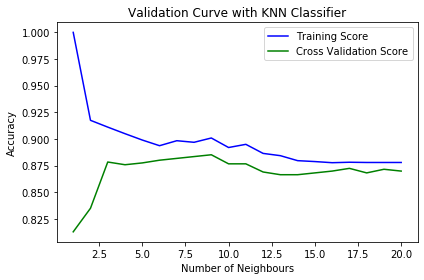

array([1.        , 0.91744681, 0.91106383, 0.90489362, 0.89893617,
       0.89361702, 0.89829787, 0.89680851, 0.90085106, 0.89191489,
       0.89489362, 0.88638298, 0.88425532, 0.87957447, 0.8787234 ,
       0.87765957, 0.87808511, 0.87787234, 0.87787234, 0.87787234])

In [151]:
#validation curve showing 9 is the optimum value least diff between train and validation score
from sklearn.model_selection import validation_curve
k_range = range(1, 21)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), normalized_INPUT, Y,param_name = "n_neighbors",param_range = k_range,cv = nskf, scoring = "accuracy")
A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(k_range, A,label = "Training Score", color = 'b')
plt.plot(k_range, B,label = "Cross Validation Score", color = 'g')

plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

A

In [152]:
B

array([0.81276596, 0.83489362, 0.87829787, 0.87574468, 0.87744681,
       0.88      , 0.88170213, 0.88340426, 0.88510638, 0.87659574,
       0.87659574, 0.86893617, 0.86638298, 0.86638298, 0.86808511,
       0.86978723, 0.87234043, 0.86808511, 0.87148936, 0.86978723])

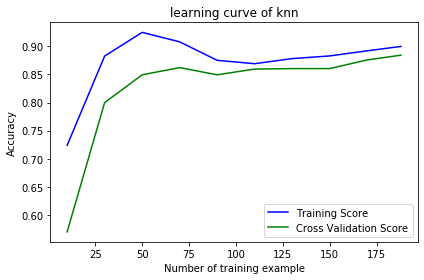

array([0.724     , 0.88266667, 0.9248    , 0.908     , 0.87511111,
       0.86909091, 0.87815385, 0.88293333, 0.892     , 0.89978723])

In [157]:
#case of overfitting solved
from sklearn.model_selection import learning_curve
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=9, p=1,weights='uniform')
train_sizes, train_scores, valid_scores = learning_curve(model, normalized_INPUT, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf)
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]


A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of knn")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

A

In [156]:
B

array([0.57021277, 0.8       , 0.8493617 , 0.86212766, 0.8493617 ,
       0.85957447, 0.86042553, 0.86042553, 0.87574468, 0.88425532])

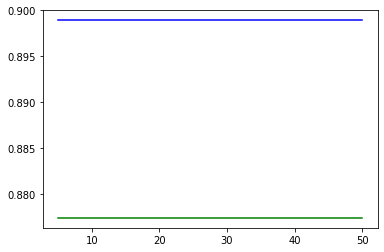

In [91]:
#leaf size has no effect on bias and variance
leaf=[5,10,15,20,25,30,35,40,45,50]
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), normalized_INPUT, Y,param_name = "leaf_size",param_range = leaf,cv = nskf, scoring = "accuracy")
A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(leaf, A,label = "Training Score", color = 'b')
plt.plot(leaf, B,label = "Cross Validation Score", color = 'g')


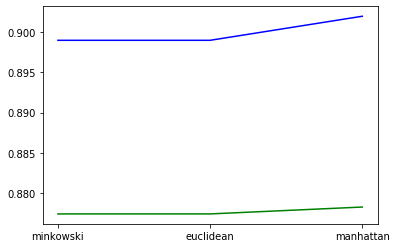

In [93]:
#metric has also no effect
metric = ['minkowski','euclidean','manhattan']
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), normalized_INPUT, Y,param_name = "metric",param_range = metric,cv = nskf, scoring = "accuracy")
A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(metric, A,label = "Training Score", color = 'b')
plt.plot(metric, B,label = "Cross Validation Score", color = 'g')

In [27]:
#RandomsearchCV to create better KNN model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from scipy.stats import randint as sp_randint

params_knn = { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan']}
knn_rs = GridSearchCV(knn, param_grid = params_knn, cv=nskf,verbose=4, scoring='accuracy')

knn_rs.fit(X_train,y_train)
knn_rs.best_params_

Fitting 25 folds for each of 90 candidates, totalling 2250 fits
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.727, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.788, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.848, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.788, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.781, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=1, weights=uniform, score=0.788, total=   0.0s
[CV] metric=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.667, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.906, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.697, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.848, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.758, total=   0.0s
[CV] metric=minkowski, n_neighbors=1, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=1, weights=distance, score=0.781,

[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.938, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.909, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=3, weights=uniform, score=0.818, total= 

[CV]  metric=minkowski, n_neighbors=4, weights=distance, score=0.909, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=4, weights=distance, score=0.788, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=4, weights=distance, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=4, weights=distance, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=4, weights=distance, score=0.812, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=4, weights=distance, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=4, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=4, weights=distance, score=0.848, 

[CV]  metric=minkowski, n_neighbors=6, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=6, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=6, weights=uniform, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=6, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=6, weights=uniform, score=0.875, total=   0.0s
[CV] metric=minkowski, n_neighbors=6, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=6, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=6, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=6, weights=uniform, score=0.848, total=   0.0s
[CV] metric=minkowski, n_neighbors=6, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=6, weights=uniform, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=6, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=6, weights=uniform, score=0.879, total= 

[CV]  metric=minkowski, n_neighbors=7, weights=uniform, score=0.848, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=7, weights=uniform, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=7, weights=uniform, score=0.909, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=7, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=7, weights=uniform, score=0.906, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=7, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=7, weights=uniform ................
[CV]  metric=minkowski, n_neighbors=7, weights=uniform, score=0.818, total= 

[CV]  metric=minkowski, n_neighbors=8, weights=distance, score=0.909, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, score=0.788, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, score=0.812, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, score=0.848, total=   0.0s
[CV] metric=minkowski, n_neighbors=8, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=8, weights=distance, score=0.818, 

[CV]  metric=minkowski, n_neighbors=10, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, score=0.848, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, score=0.781, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, score=0.848, total=   0.0s
[CV] metric=minkowski, n_neighbors=10, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=10, weights=uniform, score=0.818, 

[CV] metric=minkowski, n_neighbors=11, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=11, weights=distance, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=11, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=11, weights=distance, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=11, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=11, weights=distance, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=11, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=11, weights=distance, score=0.788, total=   0.0s
[CV] metric=minkowski, n_neighbors=11, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=11, weights=distance, score=0.812, total=   0.0s
[CV] metric=minkowski, n_neighbors=11, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=11, weights=distance, score=0.848, total=   0.0s
[CV] metric=minkowski, n_neighbors=11, weights=distance ........

[CV] metric=minkowski, n_neighbors=13, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=13, weights=uniform, score=0.906, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=13, weights=uniform, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=13, weights=uniform, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=13, weights=uniform, score=0.909, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=13, weights=uniform, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=uniform ...............
[CV]  metric=minkowski, n_neighbors=13, weights=uniform, score=0.781, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=uniform ...............

[CV]  metric=minkowski, n_neighbors=14, weights=distance, score=0.848, total=   0.0s
[CV] metric=minkowski, n_neighbors=14, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=14, weights=distance, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=14, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=14, weights=distance, score=0.938, total=   0.0s
[CV] metric=minkowski, n_neighbors=14, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=14, weights=distance, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=14, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=14, weights=distance, score=0.818, total=   0.0s
[CV] metric=minkowski, n_neighbors=14, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=14, weights=distance, score=0.879, total=   0.0s
[CV] metric=minkowski, n_neighbors=14, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=14, weights=distance, score=

[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.667, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.697, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=1, weights=uniform, score=0.848, total= 

[CV]  metric=euclidean, n_neighbors=2, weights=distance, score=0.727, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, score=0.781, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=2, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=2, weights=distance, score=0.788, 

[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.875, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=4, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=4, weights=uniform, score=0.848, total= 

[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, score=0.758, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, score=0.879, tota

[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.758, total=   0.0s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=6, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=6, weights=distance, score=0.938, 

[CV]  metric=euclidean, n_neighbors=8, weights=uniform, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=8, weights=uniform, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=8, weights=uniform, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=8, weights=uniform, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=8, weights=uniform, score=0.875, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=8, weights=uniform, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=8, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=8, weights=uniform, score=0.758, total= 

[CV]  metric=euclidean, n_neighbors=9, weights=distance, score=0.758, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=9, weights=distance, score=0.812, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=9, weights=distance, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=9, weights=distance, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=9, weights=distance, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=9, weights=distance, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=9, weights=distance, score=0.906, 

[CV]  metric=euclidean, n_neighbors=11, weights=uniform, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, score=0.781, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, score=0.879, 

[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.812, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=12, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=12, weights=distance, score=

[CV]  metric=euclidean, n_neighbors=14, weights=uniform, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=14, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=14, weights=uniform, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=14, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=14, weights=uniform, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=14, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=14, weights=uniform, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=14, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=14, weights=uniform, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=14, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=14, weights=uniform, score=0.909, total=   0.0s
[CV] metric=euclidean, n_neighbors=14, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=14, weights=uniform, score=0.879, 

[CV]  metric=euclidean, n_neighbors=15, weights=distance, score=0.844, total=   0.0s
[CV] metric=euclidean, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=15, weights=distance, score=0.879, total=   0.0s
[CV] metric=euclidean, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=15, weights=distance, score=0.848, total=   0.0s
[CV] metric=euclidean, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=15, weights=distance, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=15, weights=distance, score=0.818, total=   0.0s
[CV] metric=euclidean, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=15, weights=distance, score=0.938, total=   0.0s
[CV] metric=euclidean, n_neighbors=15, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=15, weights=distance, score=

[CV]  metric=manhattan, n_neighbors=2, weights=uniform, score=0.909, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=2, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=2, weights=uniform, score=0.844, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=2, weights=uniform, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=2, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=2, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=2, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=2, weights=uniform, score=0.818, total= 

[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.844, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............

[CV]  metric=manhattan, n_neighbors=5, weights=uniform, score=0.909, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=5, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=5, weights=uniform, score=0.875, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=5, weights=uniform, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=5, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=5, weights=uniform, score=0.818, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=5, weights=uniform, score=0.879, total= 

[CV]  metric=manhattan, n_neighbors=6, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=6, weights=uniform, score=0.818, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=6, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=6, weights=uniform, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=6, weights=uniform, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=6, weights=distance, score=0.818, total=   0.0s
[CV] metric=manhattan, n_neighbors=6, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=6, weights=distance, score=0.848, total

[CV]  metric=manhattan, n_neighbors=7, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=7, weights=distance, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=8, weights=uniform, score=0.788, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=8, weights=uniform, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=8, weights=uniform, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=8, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=8, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=8, weights=uniform, score=0.844, total

[CV]  metric=manhattan, n_neighbors=9, weights=uniform, score=0.818, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=9, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=9, weights=uniform, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=9, weights=uniform, score=0.844, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, score=0.758, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, score=0.879, tota

[CV]  metric=manhattan, n_neighbors=10, weights=distance, score=0.788, total=   0.0s
[CV] metric=manhattan, n_neighbors=10, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=10, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=10, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=10, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=10, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=10, weights=distance, score=0.938, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, score=0.758, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, score=0.818, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, score=0.8

[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.875, total=   0.0s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.909, total=   0.0s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.788, total=   0.0s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.818, total=   0.0s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=12, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=12, weights=uniform, score=0.844, 

[CV]  metric=manhattan, n_neighbors=13, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=13, weights=distance, score=0.788, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=13, weights=distance, score=0.848, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=13, weights=distance, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=13, weights=distance, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=14, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=14, weights=uniform, score=0.788, total=   0.0s
[CV] metric=manhattan, n_neighbors=14, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=14, weights=uniform, score=0.

[CV]  metric=manhattan, n_neighbors=15, weights=uniform, score=0.818, total=   0.0s
[CV] metric=manhattan, n_neighbors=15, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=15, weights=uniform, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=15, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=15, weights=uniform, score=0.844, total=   0.0s
[CV] metric=manhattan, n_neighbors=15, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=15, weights=distance, score=0.788, total=   0.0s
[CV] metric=manhattan, n_neighbors=15, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=15, weights=distance, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=15, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=15, weights=distance, score=0.879, total=   0.0s
[CV] metric=manhattan, n_neighbors=15, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=15, weights=distance, score=0.8

[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:   11.6s finished


{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

In [31]:
ann_pred2 = knn_rs.predict(X_test)
metrics.accuracy_score(y_test,ann_pred2)

0.9154929577464789

In [33]:
model_best = knn_rs
scores = cross_val_score(model_best, normalized_INPUT, Y, scoring='accuracy', cv=skf, verbose=4,n_jobs=-1)
scores
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.8s remaining:   22.2s


Accuracy: 0.868 (0.043)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.3s finished


In [34]:
from sklearn.model_selection import RepeatedStratifiedKFold

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

scores = cross_val_score(model_best, normalized_INPUT, Y, scoring='accuracy', verbose=3,cv=nskf, n_jobs=-1)
scores
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.0min remaining:   19.0s


Accuracy: 0.867 (0.041)


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished


In [89]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=9, p=1,weights='uniform')
# evaluate model
scores = cross_val_score(model, normalized_INPUT, Y, scoring='accuracy', cv=nskf, n_jobs=-1)
scores
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.884 (0.049)


In [46]:
model.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'uniform'}